In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.figsize"] = (20.0, 10.0)


# Reading the database
data = pd.read_csv("/home/gajendra/Github/Datasets/headbrain/headbrain.csv")
print(data.head())
data.shape

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


(237, 4)

In [4]:
# Collecting X and y
X = data["Head Size(cm^3)"].values
Y = data["Brain Weight(grams)"].values

In [5]:
# Calculate mean of X and y
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)
numerator = 0
denominator = 0

for index in range(n):
    numerator += (mean_X - X[index]) * (mean_Y - Y[index])
    denominator += (mean_X - X[index])**2

# slope
m = numerator/denominator
# constant
c = mean_Y - m * mean_X

print(m, c)

0.26342933948939945 325.57342104944223


In [35]:
# Now that we have the equation of the line as "y = mx + c", we can now differentiate the data by putting labels on it.
data["label"] = 0

In [37]:
for index in range(n):
    d = 0
    d = Y[index] - m * X[index] - c
    if(d >= 0):
        data["label"][index] = 1
    else:
        pass

data.sample(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams),label
217,2,2,3170,1178,1
128,1,2,4053,1312,0
138,2,1,3104,1080,0
148,2,1,3451,1340,1
71,1,2,3858,1390,1
6,1,1,3785,1400,1
114,1,2,3383,1290,1
205,2,2,3692,1305,1
79,1,2,3835,1315,0
69,1,2,4381,1415,0


In [38]:
data["label"].unique()

array([1, 0])

(array([ 4., 13., 31., 50., 50., 43., 23., 14.,  8.,  1.]),
 array([2720. , 2922.7, 3125.4, 3328.1, 3530.8, 3733.5, 3936.2, 4138.9,
        4341.6, 4544.3, 4747. ]),
 <a list of 10 Patch objects>)

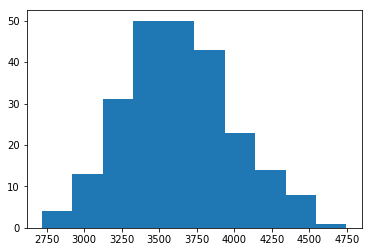

In [22]:
plt.hist(X, bins = 10)

(array([ 3.,  9., 20., 45., 53., 55., 27., 12.,  8.,  5.]),
 array([ 955., 1023., 1091., 1159., 1227., 1295., 1363., 1431., 1499.,
        1567., 1635.]),
 <a list of 10 Patch objects>)

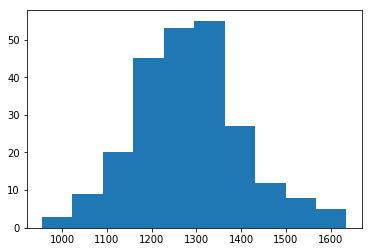

In [24]:
plt.hist(Y, bins = 10)

<BarContainer object of 237 artists>

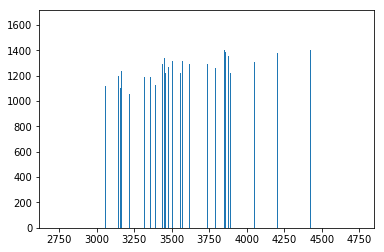

In [27]:
plt.bar(X, Y)

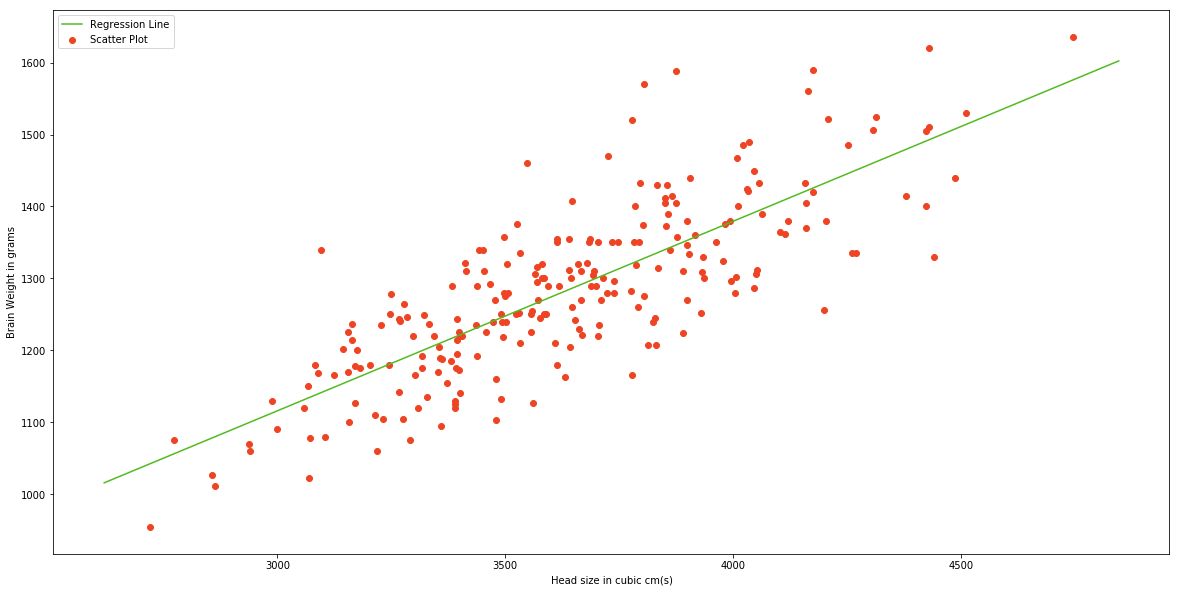

In [42]:
# Plotting Regression line and values
max_X = np.max(X) + 100
min_X = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_X, max_X, 1000)
y = m*x + c

# Plotting line
plt.plot(x, y, color = "#52b920", label = "Regression Line")

# Plotting scatter points
plt.scatter(X, Y, color = "#ef4423", label = "Scatter Plot")
plt.rcParams["figure.figsize"] = (20.0, 10.0)
plt.xlabel("Head size in cubic cm(s)")
plt.ylabel("Brain Weight in grams")
plt.legend()
plt.show()